In [141]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

# Basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [173]:
#To Check my Directory regarding the csv file location
data_df= os.getcwd()
print(data_df)

C:\Users\admin\PCA and Clustering\Main project


In [174]:
#To read the Excel
Data_df =pd.read_excel("Clustering Clean Ads_Data.xlsx")

In [175]:
Data_df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [176]:
Data_df.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [177]:
Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [178]:
Data_df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [179]:
Data_df.duplicated().sum()

0

In [180]:
Data_df.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,23066.000000,23066.000000,23066.000000,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,18330.000000,18330.000000,18330.000000
mean,385.163097,337.896037,96674.468048,2.432044e+06,1.295099e+06,1.241520e+06,10678.518816,2706.625689,0.335123,1924.252331,0.073661,7.672045,0.351061
std,233.651434,203.092885,61538.329557,4.742888e+06,2.512970e+06,2.429400e+06,17353.409363,4067.927273,0.031963,3105.238410,0.075160,6.481391,0.343334
min,120.000000,70.000000,33600.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.210000,0.000000,0.000100,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.002600,1.710000,0.090000
50%,300.000000,300.000000,72000.000000,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,0.082550,7.660000,0.160000
75%,720.000000,600.000000,84000.000000,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,0.130000,12.510000,0.570000
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,1.000000,81.560000,7.260000


# Treating a missing values of CPC,CTR and CPM.

In [181]:
Data_df.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

In [182]:
Data_df2=Data_df.drop(columns=['Timestamp','InventoryType','Ad Type','Platform','Device Type','Format'])

In [183]:
Data_df2

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.00,0.35,0.0000,0.0031,0.0,0.0
1,300,250,75000,1780,285,285,1,0.00,0.35,0.0000,0.0035,0.0,0.0
2,300,250,75000,2727,356,355,1,0.00,0.35,0.0000,0.0028,0.0,0.0
3,300,250,75000,2430,497,495,1,0.00,0.35,0.0000,0.0020,0.0,0.0
4,300,250,75000,1218,242,242,1,0.00,0.35,0.0000,0.0041,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,720,300,216000,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,720,300,216000,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,720,300,216000,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,120,600,72000,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN


In [184]:
Data_df2.isnull().sum()

Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

# CTR 

In [185]:
def calculate_ctr(clicks, impressions):
    if impressions == 0:
        return 0.0
    ctr = (clicks / impressions) * 100
    return ctr

In [186]:
Data_df2["CTR"] = Data_df2.apply(lambda row: calculate_ctr(row['Clicks'], row['Impressions']), axis=1)

In [187]:
Data_df2

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.00,0.35,0.0000,0.309598,0.0,0.0
1,300,250,75000,1780,285,285,1,0.00,0.35,0.0000,0.350877,0.0,0.0
2,300,250,75000,2727,356,355,1,0.00,0.35,0.0000,0.281690,0.0,0.0
3,300,250,75000,2430,497,495,1,0.00,0.35,0.0000,0.202020,0.0,0.0
4,300,250,75000,1218,242,242,1,0.00,0.35,0.0000,0.413223,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,720,300,216000,1,1,1,1,0.07,0.35,0.0455,100.000000,NaN,NaN
23062,720,300,216000,3,2,2,1,0.04,0.35,0.0260,50.000000,NaN,NaN
23063,720,300,216000,2,1,1,1,0.05,0.35,0.0325,100.000000,NaN,NaN
23064,120,600,72000,7,1,1,1,0.07,0.35,0.0455,100.000000,NaN,NaN


In [188]:
#For CTR
Data_df2.iloc[73:102]

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
73,300,250,75000,1789,306,300,1,0.00,0.35,0.00,0.333333,NaN,NaN
74,300,250,75000,1784,274,274,1,0.00,0.35,0.00,0.364964,NaN,NaN
75,300,250,75000,2095,379,375,1,0.00,0.35,0.00,0.266667,NaN,NaN
76,300,250,75000,1800,308,307,1,0.00,0.35,0.00,0.325733,NaN,NaN
77,300,250,75000,1732,275,273,1,0.00,0.35,0.00,0.366300,NaN,NaN
78,300,250,75000,1594,250,247,1,0.00,0.35,0.00,0.404858,NaN,NaN
79,300,250,75000,1605,215,213,1,0.00,0.35,0.00,0.469484,NaN,NaN
80,300,250,75000,631,67,65,1,0.00,0.35,0.00,1.538462,NaN,NaN
81,300,250,75000,1671,373,372,1,0.00,0.35,0.00,0.268817,NaN,NaN
82,300,250,75000,1424,274,269,1,0.00,0.35,0.00,0.371747,NaN,NaN


In [189]:
#For CTR
Data_df2.iloc[18361:23066]

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
18361,120,600,72000,85180,60314,51404,11634,977.66,0.35,635.4790,22.632480,NaN,NaN
18362,480,70,33600,1728037,848496,805292,4521,1609.85,0.35,1046.4025,0.561411,NaN,NaN
18363,480,70,33600,477252,241244,233460,647,324.05,0.35,210.6325,0.277135,NaN,NaN
18364,720,300,216000,537278,208979,179801,26219,1596.59,0.35,1037.7835,14.582233,NaN,NaN
18365,720,300,216000,419176,235550,191591,19053,1926.71,0.35,1252.3615,9.944622,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,720,300,216000,1,1,1,1,0.07,0.35,0.0455,100.000000,NaN,NaN
23062,720,300,216000,3,2,2,1,0.04,0.35,0.0260,50.000000,NaN,NaN
23063,720,300,216000,2,1,1,1,0.05,0.35,0.0325,100.000000,NaN,NaN
23064,120,600,72000,7,1,1,1,0.07,0.35,0.0455,100.000000,NaN,NaN


# CPM

In [190]:
def calculate_cpm(Spend, impressions):
    if impressions == 0:
        return 0.0
    cpm = (Spend / impressions) * 1000
    return cpm

In [191]:
Data_df2["CPM"] = Data_df2.apply(lambda row: calculate_ctr(row['Spend'], row['Impressions']), axis=1)

In [192]:
Data_df2

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.00,0.35,0.0000,0.309598,0.0,0.0
1,300,250,75000,1780,285,285,1,0.00,0.35,0.0000,0.350877,0.0,0.0
2,300,250,75000,2727,356,355,1,0.00,0.35,0.0000,0.281690,0.0,0.0
3,300,250,75000,2430,497,495,1,0.00,0.35,0.0000,0.202020,0.0,0.0
4,300,250,75000,1218,242,242,1,0.00,0.35,0.0000,0.413223,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,720,300,216000,1,1,1,1,0.07,0.35,0.0455,100.000000,7.0,NaN
23062,720,300,216000,3,2,2,1,0.04,0.35,0.0260,50.000000,2.0,NaN
23063,720,300,216000,2,1,1,1,0.05,0.35,0.0325,100.000000,5.0,NaN
23064,120,600,72000,7,1,1,1,0.07,0.35,0.0455,100.000000,7.0,NaN


In [193]:
#For CPM 
Data_df2.iloc[73:102]

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
73,300,250,75000,1789,306,300,1,0.00,0.35,0.00,0.333333,0.000000,NaN
74,300,250,75000,1784,274,274,1,0.00,0.35,0.00,0.364964,0.000000,NaN
75,300,250,75000,2095,379,375,1,0.00,0.35,0.00,0.266667,0.000000,NaN
76,300,250,75000,1800,308,307,1,0.00,0.35,0.00,0.325733,0.000000,NaN
77,300,250,75000,1732,275,273,1,0.00,0.35,0.00,0.366300,0.000000,NaN
78,300,250,75000,1594,250,247,1,0.00,0.35,0.00,0.404858,0.000000,NaN
79,300,250,75000,1605,215,213,1,0.00,0.35,0.00,0.469484,0.000000,NaN
80,300,250,75000,631,67,65,1,0.00,0.35,0.00,1.538462,0.000000,NaN
81,300,250,75000,1671,373,372,1,0.00,0.35,0.00,0.268817,0.000000,NaN
82,300,250,75000,1424,274,269,1,0.00,0.35,0.00,0.371747,0.000000,NaN


In [194]:
#For CPM
Data_df2.iloc[18361:23066]

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
18361,120,600,72000,85180,60314,51404,11634,977.66,0.35,635.4790,22.632480,1.901914,NaN
18362,480,70,33600,1728037,848496,805292,4521,1609.85,0.35,1046.4025,0.561411,0.199909,NaN
18363,480,70,33600,477252,241244,233460,647,324.05,0.35,210.6325,0.277135,0.138803,NaN
18364,720,300,216000,537278,208979,179801,26219,1596.59,0.35,1037.7835,14.582233,0.887976,NaN
18365,720,300,216000,419176,235550,191591,19053,1926.71,0.35,1252.3615,9.944622,1.005637,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,720,300,216000,1,1,1,1,0.07,0.35,0.0455,100.000000,7.000000,NaN
23062,720,300,216000,3,2,2,1,0.04,0.35,0.0260,50.000000,2.000000,NaN
23063,720,300,216000,2,1,1,1,0.05,0.35,0.0325,100.000000,5.000000,NaN
23064,120,600,72000,7,1,1,1,0.07,0.35,0.0455,100.000000,7.000000,NaN


# CPC

In [195]:
def calculate_cpc(Spend, Clicks):
    if Clicks == 0:
        return 0.0
    cpc = (Spend / Clicks)
    return cpc

In [196]:
Data_df2["CPC"] = Data_df2.apply(lambda row: calculate_cpc(row['Spend'], row['Clicks']), axis=1)

In [197]:
Data_df2

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.00,0.35,0.0000,0.309598,0.0,0.00
1,300,250,75000,1780,285,285,1,0.00,0.35,0.0000,0.350877,0.0,0.00
2,300,250,75000,2727,356,355,1,0.00,0.35,0.0000,0.281690,0.0,0.00
3,300,250,75000,2430,497,495,1,0.00,0.35,0.0000,0.202020,0.0,0.00
4,300,250,75000,1218,242,242,1,0.00,0.35,0.0000,0.413223,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,720,300,216000,1,1,1,1,0.07,0.35,0.0455,100.000000,7.0,0.07
23062,720,300,216000,3,2,2,1,0.04,0.35,0.0260,50.000000,2.0,0.04
23063,720,300,216000,2,1,1,1,0.05,0.35,0.0325,100.000000,5.0,0.05
23064,120,600,72000,7,1,1,1,0.07,0.35,0.0455,100.000000,7.0,0.07


In [198]:
#For CPC 
Data_df2.iloc[73:102]

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
73,300,250,75000,1789,306,300,1,0.00,0.35,0.00,0.333333,0.000000,0.00
74,300,250,75000,1784,274,274,1,0.00,0.35,0.00,0.364964,0.000000,0.00
75,300,250,75000,2095,379,375,1,0.00,0.35,0.00,0.266667,0.000000,0.00
76,300,250,75000,1800,308,307,1,0.00,0.35,0.00,0.325733,0.000000,0.00
77,300,250,75000,1732,275,273,1,0.00,0.35,0.00,0.366300,0.000000,0.00
78,300,250,75000,1594,250,247,1,0.00,0.35,0.00,0.404858,0.000000,0.00
79,300,250,75000,1605,215,213,1,0.00,0.35,0.00,0.469484,0.000000,0.00
80,300,250,75000,631,67,65,1,0.00,0.35,0.00,1.538462,0.000000,0.00
81,300,250,75000,1671,373,372,1,0.00,0.35,0.00,0.268817,0.000000,0.00
82,300,250,75000,1424,274,269,1,0.00,0.35,0.00,0.371747,0.000000,0.00


In [199]:
#For CPC
Data_df2.iloc[18361:23066]

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
18361,120,600,72000,85180,60314,51404,11634,977.66,0.35,635.4790,22.632480,1.901914,0.084035
18362,480,70,33600,1728037,848496,805292,4521,1609.85,0.35,1046.4025,0.561411,0.199909,0.356083
18363,480,70,33600,477252,241244,233460,647,324.05,0.35,210.6325,0.277135,0.138803,0.500850
18364,720,300,216000,537278,208979,179801,26219,1596.59,0.35,1037.7835,14.582233,0.887976,0.060894
18365,720,300,216000,419176,235550,191591,19053,1926.71,0.35,1252.3615,9.944622,1.005637,0.101124
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,720,300,216000,1,1,1,1,0.07,0.35,0.0455,100.000000,7.000000,0.070000
23062,720,300,216000,3,2,2,1,0.04,0.35,0.0260,50.000000,2.000000,0.040000
23063,720,300,216000,2,1,1,1,0.05,0.35,0.0325,100.000000,5.000000,0.050000
23064,120,600,72000,7,1,1,1,0.07,0.35,0.0455,100.000000,7.000000,0.070000


# z-score scaling

In [200]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [201]:
X=StandardScaler()

In [202]:
Scaled_df = X.fit_transform(Data_df2)
Scaled_data = pd.DataFrame(Scaled_df,columns=Data_df2.columns)
Scaled_df_rounded = Scaled_data.round(4)
Scaled_df_rounded

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.3645,-0.4328,-0.3522,-0.5124,-0.5152,-0.5109,-0.6153,-0.6654,0.4654,-0.6197,-0.8746,-0.9271,-0.9866
1,-0.3645,-0.4328,-0.3522,-0.5124,-0.5153,-0.5109,-0.6153,-0.6654,0.4654,-0.6197,-0.8701,-0.9271,-0.9866
2,-0.3645,-0.4328,-0.3522,-0.5122,-0.5152,-0.5109,-0.6153,-0.6654,0.4654,-0.6197,-0.8776,-0.9271,-0.9866
3,-0.3645,-0.4328,-0.3522,-0.5123,-0.5152,-0.5108,-0.6153,-0.6654,0.4654,-0.6197,-0.8862,-0.9271,-0.9866
4,-0.3645,-0.4328,-0.3522,-0.5125,-0.5153,-0.5110,-0.6153,-0.6654,0.4654,-0.6197,-0.8634,-0.9271,-0.9866
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,1.4331,-0.1866,1.9391,-0.5128,-0.5154,-0.5111,-0.6153,-0.6654,0.4654,-0.6197,9.8890,6.8013,-0.7815
23062,1.4331,-0.1866,1.9391,-0.5128,-0.5154,-0.5110,-0.6153,-0.6654,0.4654,-0.6197,4.4905,1.2810,-0.8694
23063,1.4331,-0.1866,1.9391,-0.5128,-0.5154,-0.5111,-0.6153,-0.6654,0.4654,-0.6197,9.8890,4.5932,-0.8401
23064,-1.1349,1.2906,-0.4010,-0.5128,-0.5154,-0.5111,-0.6153,-0.6654,0.4654,-0.6197,9.8890,6.8013,-0.7815


In [203]:
Scaled_df_rounded.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.3645,-0.4328,-0.3522,-0.5124,-0.5152,-0.5109,-0.6153,-0.6654,0.4654,-0.6197,-0.8746,-0.9271,-0.9866
1,-0.3645,-0.4328,-0.3522,-0.5124,-0.5153,-0.5109,-0.6153,-0.6654,0.4654,-0.6197,-0.8701,-0.9271,-0.9866
2,-0.3645,-0.4328,-0.3522,-0.5122,-0.5152,-0.5109,-0.6153,-0.6654,0.4654,-0.6197,-0.8776,-0.9271,-0.9866
3,-0.3645,-0.4328,-0.3522,-0.5123,-0.5152,-0.5108,-0.6153,-0.6654,0.4654,-0.6197,-0.8862,-0.9271,-0.9866
4,-0.3645,-0.4328,-0.3522,-0.5125,-0.5153,-0.5110,-0.6153,-0.6654,0.4654,-0.6197,-0.8634,-0.9271,-0.9866


In [204]:
#Create a Copy of the Data to store lables to the each algorithm
data_scaled_copy = Scaled_df_rounded.copy(deep=True)

# It affect te speed of the algorithm in Faster convergence and efficient distance calculation

# Hierarchical Clustering using ward and Euclidean Distance

In [205]:
#Import Libraries
import scipy.cluster.hierarchy as shc

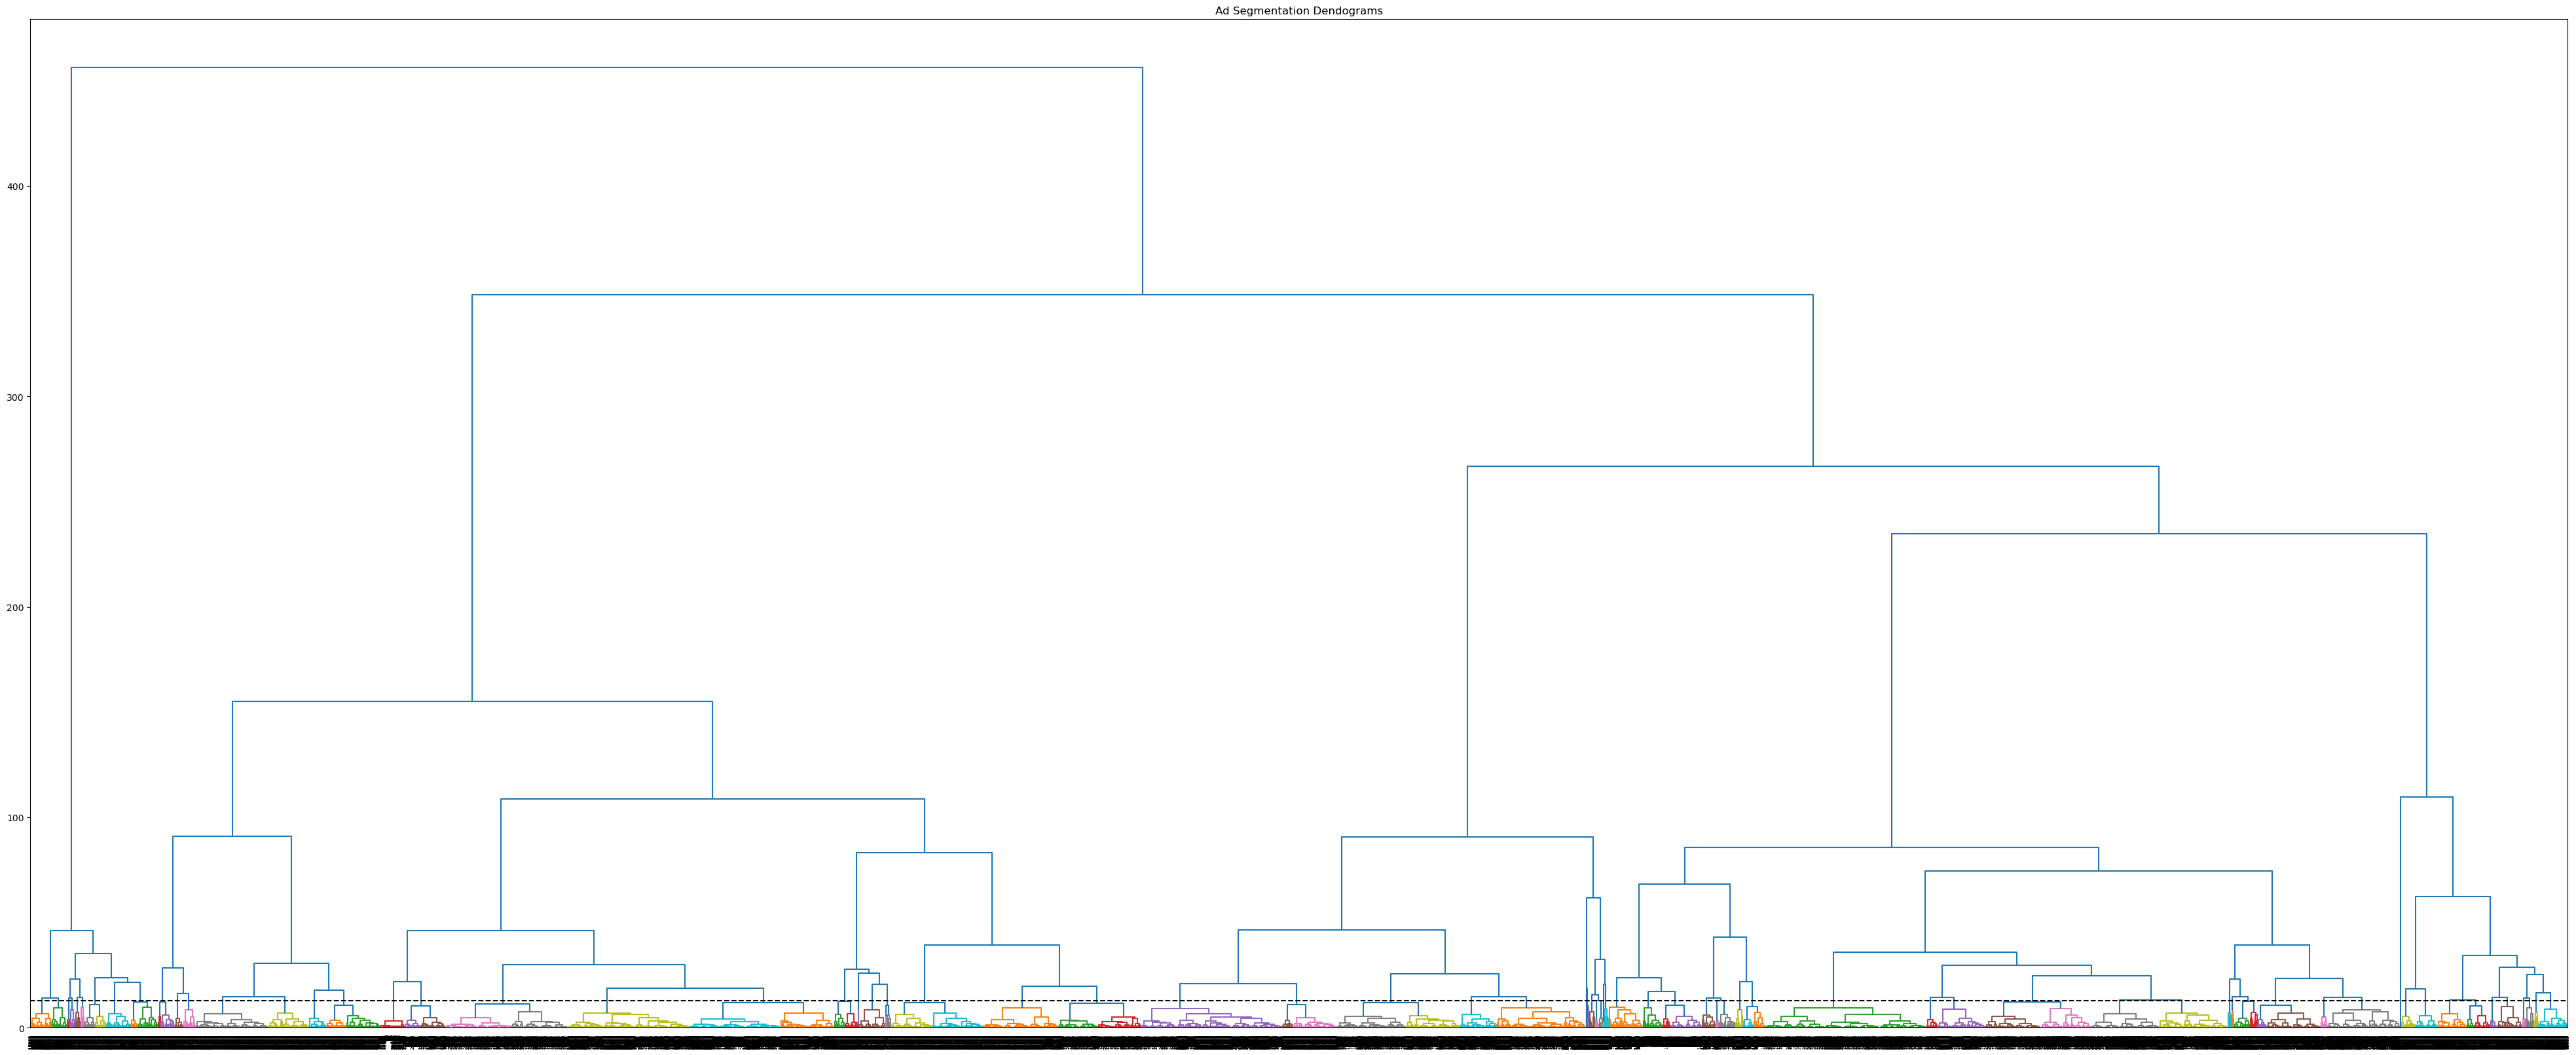

In [206]:
plt.figure(figsize=(50, 20))
plt.title("Ad Segmentation Dendograms")
dend = shc.dendrogram(shc.linkage(Scaled_df_rounded, method='ward'),color_threshold=10)
plt.axhline(13, color='black', linestyle='--')
plt.show()

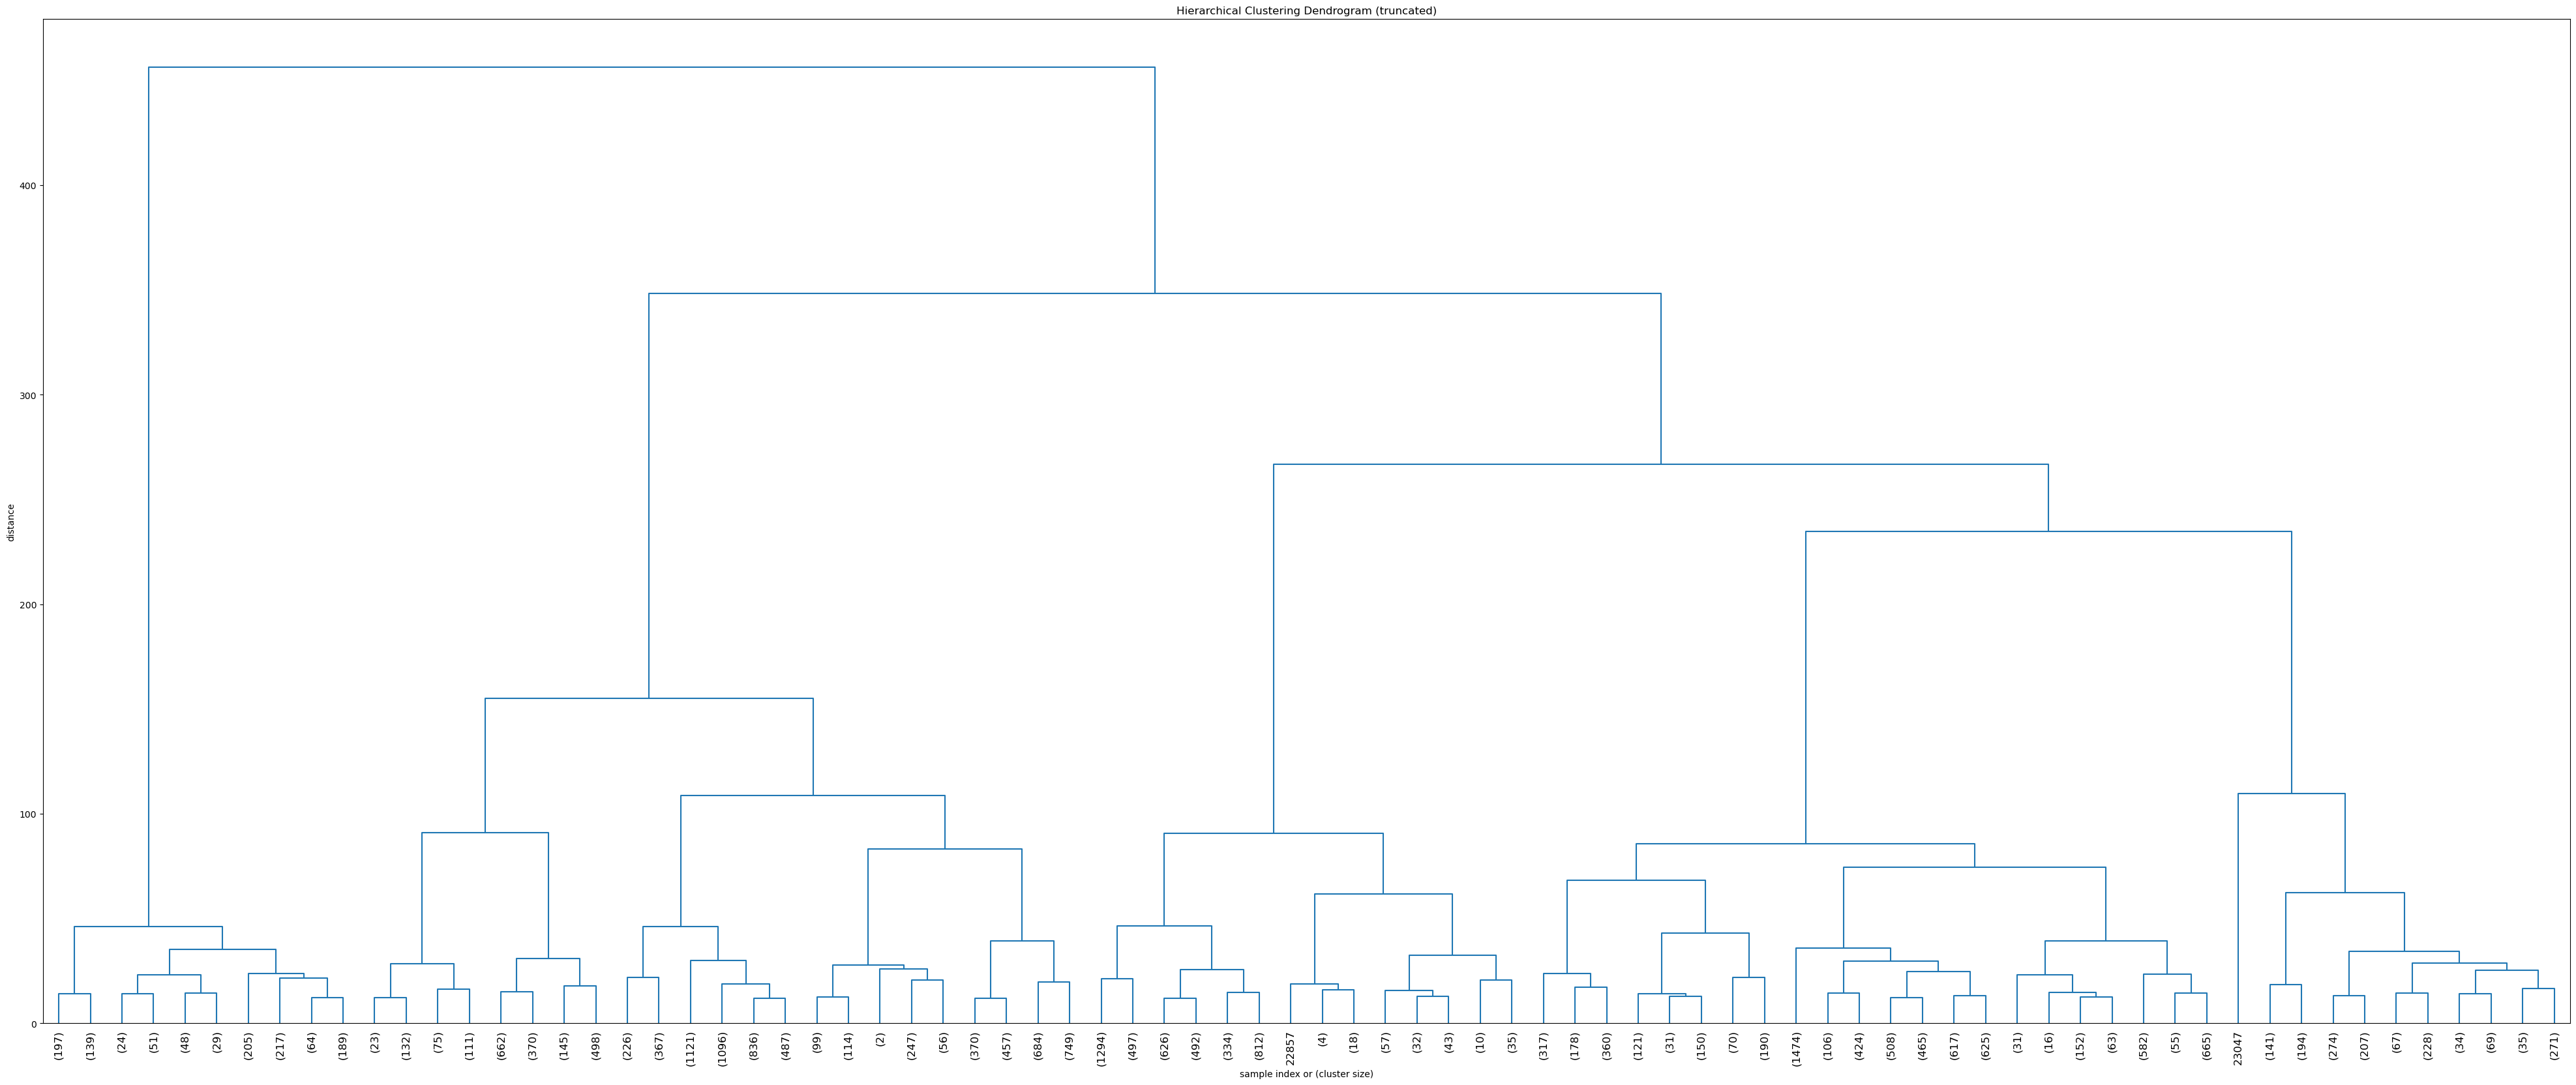

In [207]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(50, 20))
Z_Final = linkage(Scaled_df_rounded, 'ward', metric='euclidean')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_Final,
    truncate_mode='lastp',      
    p=80, 
    leaf_rotation=90,
    leaf_font_size=12,
    color_threshold=10 
)
plt.show()

# Elbow plot (up to n=10) and optimum number of clusters for k-means algorithm

# K Means Clustering

In [208]:

#Empty dictionary to store the SSE for each value of k
sse = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(Scaled_df_rounded)
    sse[k] = kmeans.inertia_

In [209]:
sse

{1: 299857.9045291118,
 2: 188282.10006831674,
 3: 130712.88845828717,
 4: 94685.66427330773,
 5: 66289.09995423314,
 6: 55262.62094934442,
 7: 49134.26641746324,
 8: 44094.42966078648,
 9: 40162.021534148436}

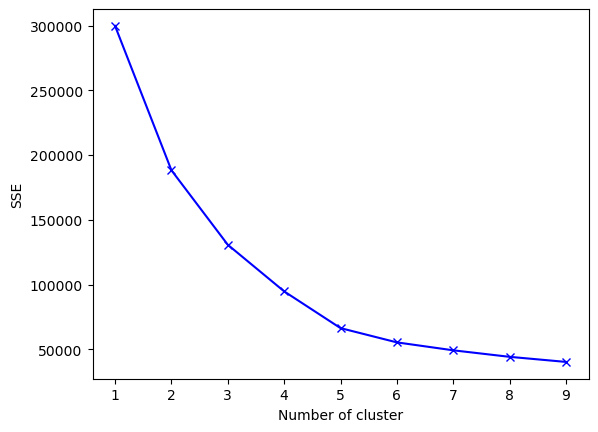

In [210]:
#Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

We can see the above plot the constant dip from cluster 2 to 5 and it doesn't to be clear in elbow plot. so we can go to silohoutte method

# Silhoutte Score for each k and optimum number of cluster upto 10

#Empty dictionary to store the Silhouette score for each value of k
sc = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(Scaled_df_rounded)
    labels = kmeans.predict(Scaled_df_rounded)
    sc[k] = silhouette_score(Scaled_df_rounded, labels)

In [211]:
sc

{2: 0.6122142565154061,
 3: 0.3893971646081457,
 4: 0.5033481674424297,
 5: 0.5571181254327098,
 6: 0.5291807156569938,
 7: 0.5367025996117908,
 8: 0.5522401121328333,
 9: 0.5531407049218378}

See, There is a significant drop occured from 2 to 3 so 2 is the highest value. We can take upto 2 clusters for the following observations.K=2

# Highest K= 2

In [218]:
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(Scaled_df_rounded)

#Adding predicted labels to the original data and scaled data 
data_scaled_copy['KMeans_Labels'] = kmeans.predict(Scaled_df_rounded)
Data_df2['KMeans_Labels'] = kmeans.predict(Scaled_df_rounded)

In [219]:
Data_df2['KMeans_Labels'].value_counts()

0    21580
1     1486
Name: KMeans_Labels, dtype: int64

In [220]:
Data_df2.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,KMeans_Labels
0,300,250,75000,1806,325,323,1,0.0,0.35,0.0,0.309598,0.0,0.0,0
1,300,250,75000,1780,285,285,1,0.0,0.35,0.0,0.350877,0.0,0.0,0
2,300,250,75000,2727,356,355,1,0.0,0.35,0.0,0.281690,0.0,0.0,0
3,300,250,75000,2430,497,495,1,0.0,0.35,0.0,0.202020,0.0,0.0,0
4,300,250,75000,1218,242,242,1,0.0,0.35,0.0,0.413223,0.0,0.0,0


In [222]:
# Filtering and checking the features in the clusters
Data_df2[Data_df2['KMeans_Labels']== 0]

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,KMeans_Labels
0,300,250,75000,1806,325,323,1,0.00,0.35,0.0000,0.309598,0.0,0.00,0
1,300,250,75000,1780,285,285,1,0.00,0.35,0.0000,0.350877,0.0,0.00,0
2,300,250,75000,2727,356,355,1,0.00,0.35,0.0000,0.281690,0.0,0.00,0
3,300,250,75000,2430,497,495,1,0.00,0.35,0.0000,0.202020,0.0,0.00,0
4,300,250,75000,1218,242,242,1,0.00,0.35,0.0000,0.413223,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,720,300,216000,1,1,1,1,0.07,0.35,0.0455,100.000000,7.0,0.07,0
23062,720,300,216000,3,2,2,1,0.04,0.35,0.0260,50.000000,2.0,0.04,0
23063,720,300,216000,2,1,1,1,0.05,0.35,0.0325,100.000000,5.0,0.05,0
23064,120,600,72000,7,1,1,1,0.07,0.35,0.0455,100.000000,7.0,0.07,0


There are skewed clustering in few observation.Lets Check out the profiles of these clusters

In [223]:
Data_df2[Data_df2['KMeans_Labels']==1]

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,KMeans_Labels
16384,728,90,65520,7858375,4634576,4424935,5896,7017.38,0.27,5122.6900,0.133245,0.158587,1.190193,1
16402,728,90,65520,7675755,4526852,4322032,5874,7059.35,0.27,5153.3200,0.135908,0.163334,1.201796,1
16422,728,90,65520,7152696,4535878,4304881,6124,7102.15,0.27,5184.5700,0.142257,0.164979,1.159724,1
16450,728,90,65520,7652409,4673157,4454148,6057,7180.35,0.27,5241.6600,0.135986,0.161206,1.185463,1
16451,728,90,65520,7545737,4676690,4451969,6027,7181.51,0.27,5242.5000,0.135378,0.161311,1.191556,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21801,728,90,65520,18091919,10237491,9887787,21110,16387.79,0.23,12618.5983,0.213496,0.165738,0.776305,1
21810,728,90,65520,16839345,9313772,8952773,15108,12200.57,0.25,9150.4275,0.168752,0.136277,0.807557,1
21821,728,90,65520,15415271,8827453,8507614,18094,15684.53,0.23,12077.0881,0.212680,0.184359,0.866836,1
21823,728,90,65520,13785203,7860571,7576453,15881,14383.62,0.25,10787.7150,0.209610,0.189846,0.905712,1


In [224]:
#Calculating mean and median of the original data for each label
mean = Data_df2.groupby('KMeans_Labels').mean()
median = Data_df2.groupby('KMeans_Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_0 Median', 'group_1 Median']
df_kmeans.T

,group_0 Mean,group_1 Mean,group_0 Median,group_1 Median
Ad - Length,3.645779e+02,6.841050e+02,300.000000,7.280000e+02
Ad- Width,3.531738e+02,1.160296e+02,300.000000,9.000000e+01
Ad Size,9.852045e+04,6.986673e+04,72000.000000,6.552000e+04
Available_Impressions,1.349530e+06,1.815254e+07,408718.000000,1.894390e+07
Matched_Queries,7.173359e+05,9.685496e+06,221739.000000,1.024037e+07
Impressions,6.848326e+05,9.325842e+06,188945.500000,9.857084e+06
Clicks,1.019593e+04,1.768678e+04,3912.000000,1.896250e+04
Spend,1.818878e+03,1.559868e+04,1299.980000,1.607917e+04
Fee,3.417966e-01,2.382100e-01,0.350000,2.300000e-01
Revenue,1.234364e+03,1.194295e+04,844.985000,1.238096e+04


In Above table, we can see that CPM is high.Even though the the impressions is low when compared to other means.
Also,the cluster 1 clicks is slight low(when compare to cluster 2) and CTR is high. Let go with boxplot to visualize in bigger cluster

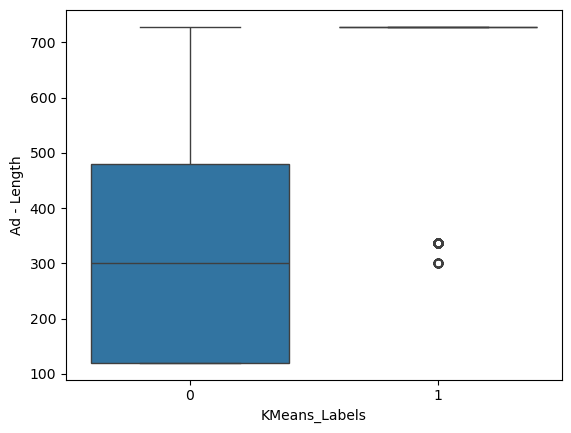

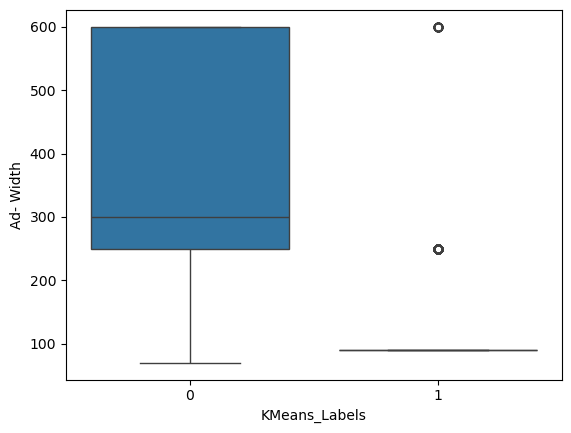

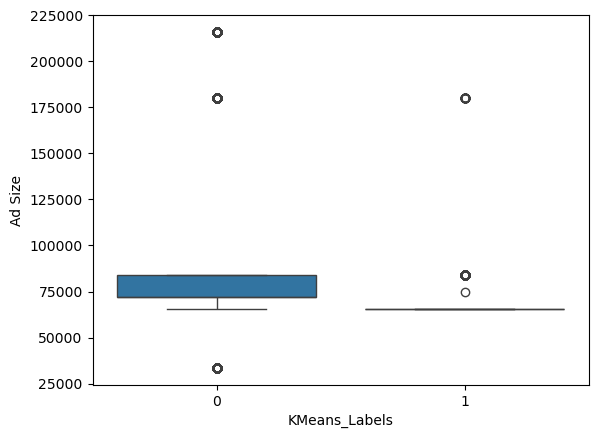

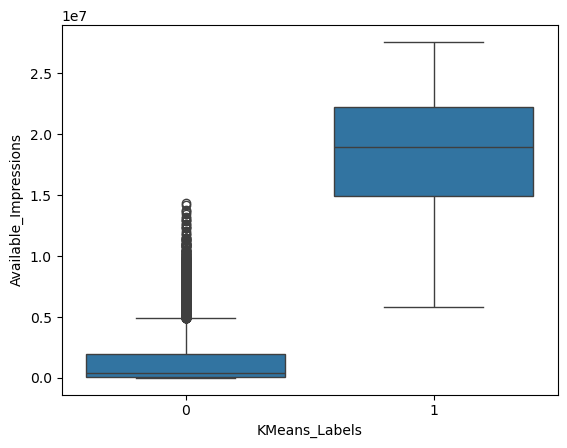

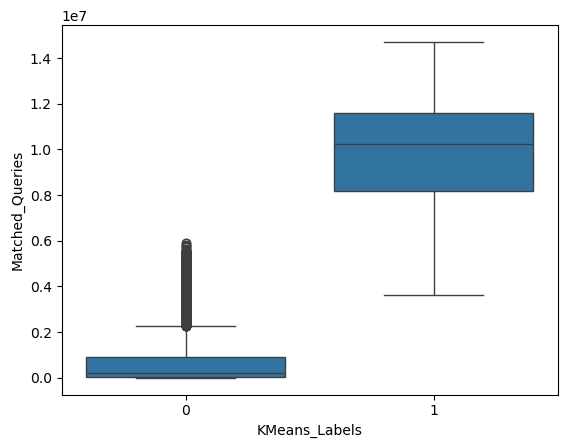

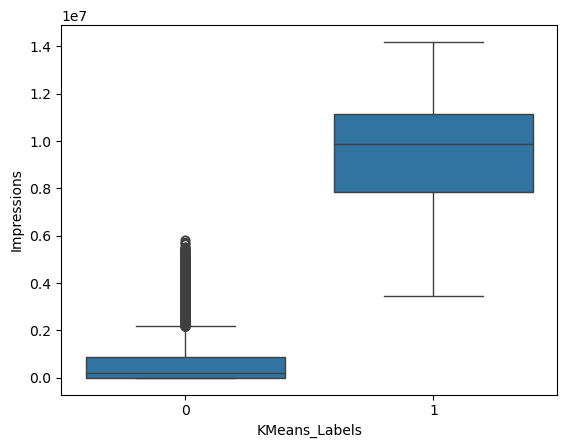

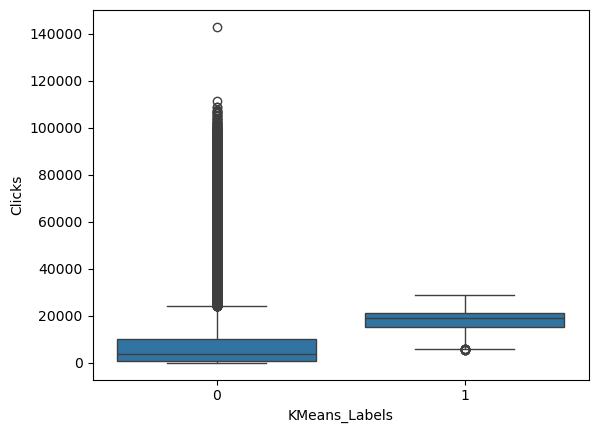

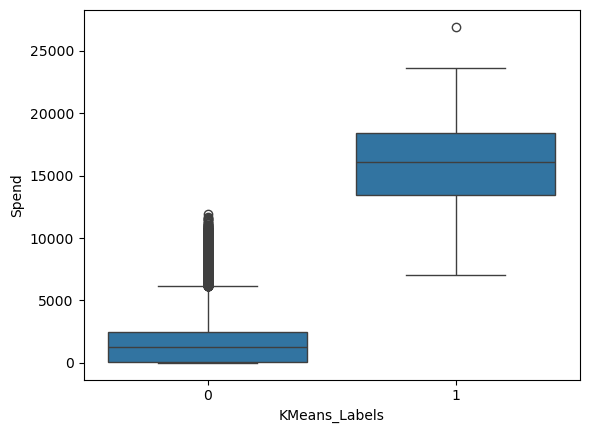

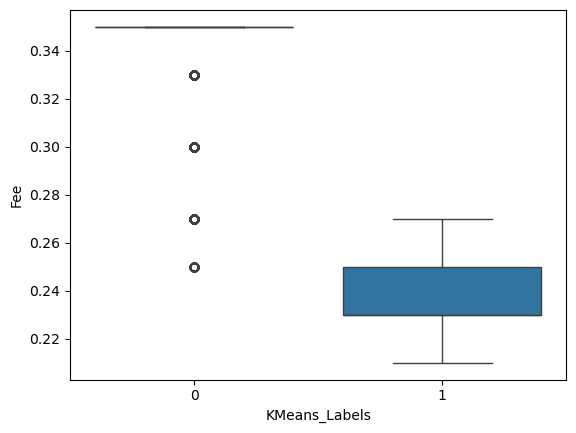

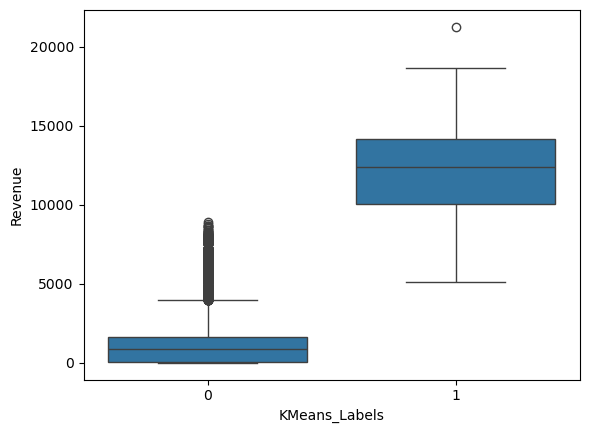

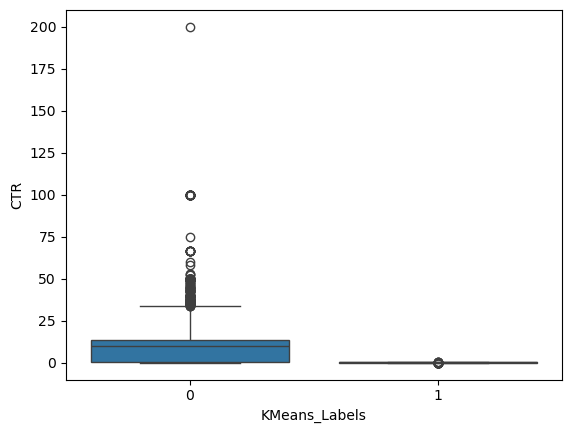

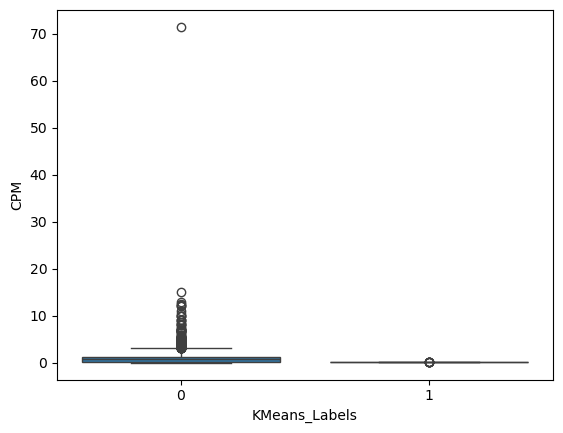

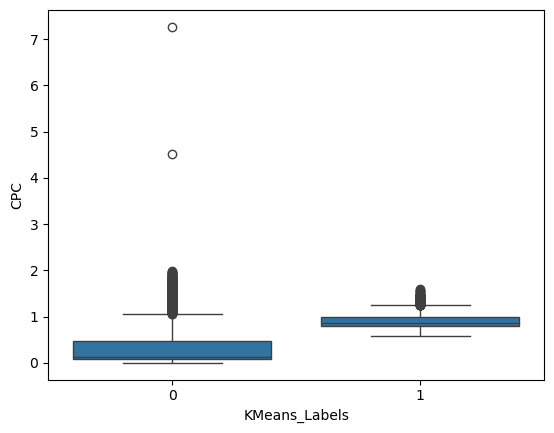

In [225]:
cols_visualise = ['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions', 'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue','CTR', 'CPM', 'CPC']

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = Data_df2)
    plt.show()